### Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

the dataset has 1000 rows and 40 columns

In [4]:
#checking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There seems to be a single column with null values

In [5]:
df['_c39'].nunique

<bound method IndexOpsMixin.nunique of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64>

We can drop the column as all the values are NAN


In [6]:
df.drop(['_c39'],axis=1,inplace=True)

In [7]:
#checking unique values
for i in df.columns:
    print("no of unique values in",i,':', df[i].nunique())

no of unique values in months_as_customer : 391
no of unique values in age : 46
no of unique values in policy_number : 1000
no of unique values in policy_bind_date : 951
no of unique values in policy_state : 3
no of unique values in policy_csl : 3
no of unique values in policy_deductable : 3
no of unique values in policy_annual_premium : 991
no of unique values in umbrella_limit : 11
no of unique values in insured_zip : 995
no of unique values in insured_sex : 2
no of unique values in insured_education_level : 7
no of unique values in insured_occupation : 14
no of unique values in insured_hobbies : 20
no of unique values in insured_relationship : 6
no of unique values in capital-gains : 338
no of unique values in capital-loss : 354
no of unique values in incident_date : 60
no of unique values in incident_type : 4
no of unique values in collision_type : 4
no of unique values in incident_severity : 4
no of unique values in authorities_contacted : 5
no of unique values in incident_state :

We can see that some of the columns are categorical

In [8]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

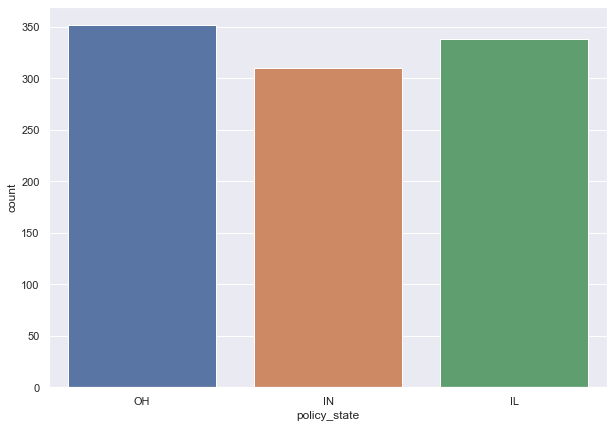

In [10]:
#checking the clumns with categorical data
sns.set_theme(style="darkgrid")
print(df['policy_state'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['policy_state'])

OH 
IL 
IN    are the 3 catogories in this olumn

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

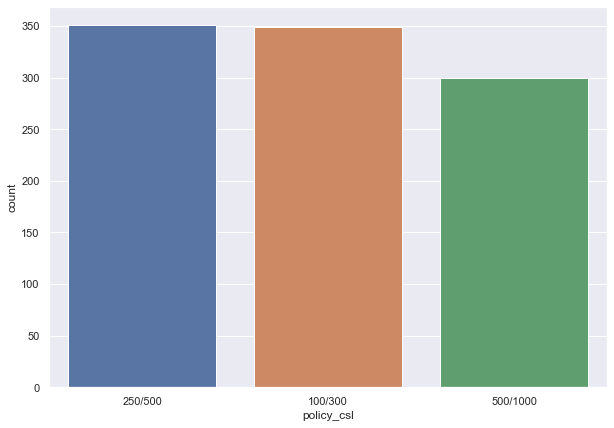

In [11]:
#checking the clumns with categorical data
print(df['policy_csl'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['policy_csl'])

 Combined Single Limit (CSL) - how the insurance cover, prperty damage and personal injury, in this case property damage coverage

In [14]:
#Grouping num and cat cols
#Separating numerical and categorical columns
cat_cols = ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 
              'insured_education_level', 'insured_occupation', 'insured_hobbies', 
              'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 
              'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
              'incident_location', 'property_damage', 'police_report_available', 'auto_make', 
              'auto_model', 'fraud_reported']

num_cols = ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 
              'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
              'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 
              'injury_claim', 'property_claim', 'vehicle_claim','auto_year']

----- policy_bind_date-----
28-04-1992    3
05-08-1992    3
01-01-2006    3
28-01-2010    2
05-07-2014    2
             ..
27-11-1992    1
25-10-2007    1
06-03-2003    1
15-02-2011    1
01-06-2006    1
Name: policy_bind_date, Length: 951, dtype: int64


----- policy_state-----
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


----- policy_csl-----
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


----- insured_sex-----
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


----- insured_education_level-----
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


----- insured_occupation-----
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-f

We can see there are ? in the data set

In [20]:
#changing ? to Nan
df = df.replace('?',np.NaN)

In [21]:
#checking NAn

df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

#3 columns have Nan values


Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

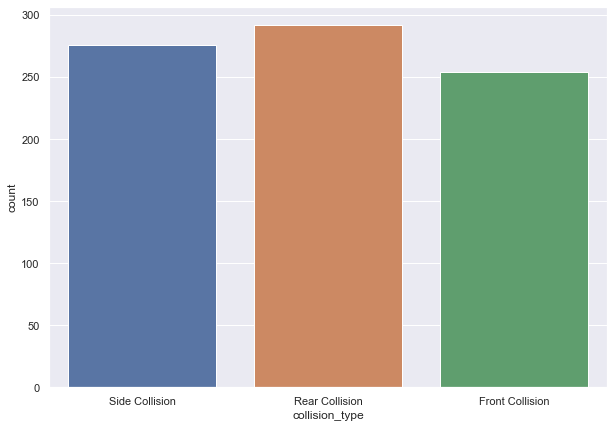

In [22]:
#checking the clumns with categorical data
sns.set_theme(style="darkgrid")
print(df['collision_type'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['collision_type'])

The collition type column is categorical and Nan values can be  replaced by mode

NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

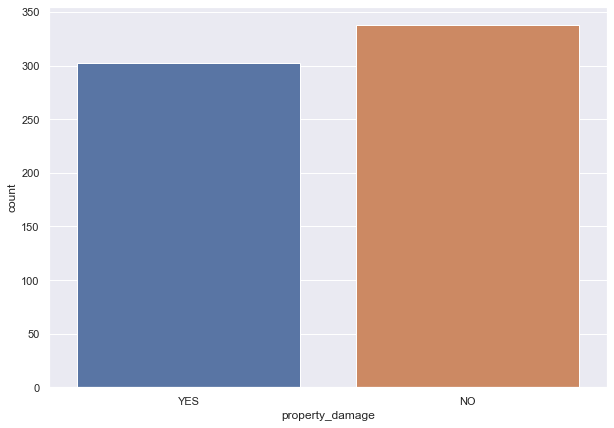

In [23]:
#checking the clumns with categorical data
sns.set_theme(style="darkgrid")
print(df['property_damage'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['property_damage'])

Property damage column denotes if there is a property damage, categorical column with NAn values

NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

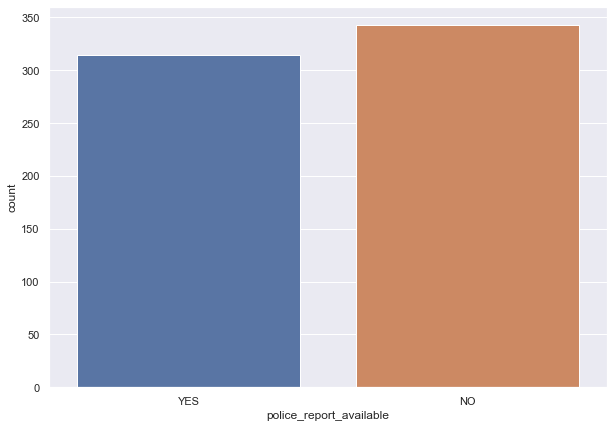

In [26]:
#checking the clumns with categorical data
sns.set_theme(style="darkgrid")
print(df['police_report_available'].value_counts())
plt.figure(figsize=(10,7))
##plt.xticks(rotation=-50)
sns.countplot(df['police_report_available'])

Data denotes whether the police report is available, catogorical data

In [27]:
#since 3 are categorical replacing them with the most frequent doesnt make sense, hence leaving the same as information not available
df['property_damage'].fillna('No_info', inplace = True)
df['police_report_available'].fillna('No_info', inplace = True)
df['collision_type'].fillna('No_info',inplace=True)

In [28]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [31]:
 
#checking the clumns with categorical data

print(df['incident_location'].value_counts())
print(df['incident_location'].nunique())

5383 Maple Drive         1
5474 Weaver Hwy          1
5431 3rd Ridge           1
2757 4th Hwy             1
2324 Texas Ridge         1
                        ..
2230 1st St              1
8917 Tree Ridge          1
6668 Andromedia Ridge    1
3439 Andromedia Hwy      1
5499 Flute Ridge         1
Name: incident_location, Length: 1000, dtype: int64
1000


We can drop the column, every values are unique

In [32]:
df.drop(['incident_location'],axis=1,inplace=True)

In [33]:

print(df['policy_number'].value_counts())
print(df['policy_number'].nunique())

116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
1000


All unique values, can be droped

In [34]:

print(df['policy_bind_date'].value_counts())
print(df['policy_bind_date'].nunique())

28-04-1992    3
05-08-1992    3
01-01-2006    3
28-01-2010    2
05-07-2014    2
             ..
27-11-1992    1
25-10-2007    1
06-03-2003    1
15-02-2011    1
01-06-2006    1
Name: policy_bind_date, Length: 951, dtype: int64
951


Date colum, can be droped

In [35]:

print(df['incident_date'].value_counts())
print(df['incident_date'].nunique())

02-02-2015    28
17-02-2015    26
07-01-2015    25
24-01-2015    24
10-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
30-01-2015    21
13-01-2015    21
06-02-2015    20
22-02-2015    20
12-02-2015    20
31-01-2015    20
23-02-2015    19
12-01-2015    19
01-01-2015    19
21-02-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
20-01-2015    18
28-02-2015    18
14-02-2015    18
18-01-2015    18
25-02-2015    18
01-02-2015    18
24-02-2015    17
26-02-2015    17
06-01-2015    17
09-01-2015    17
08-02-2015    17
15-02-2015    16
05-02-2015    16
16-01-2015    16
13-02-2015    16
16-02-2015    16
18-02-2015    15
17-01-2015    15
15-01-2015    15
28-01-2015    15
20-02-2015    14
27-02-2015    14
22-01-2015    14
03-02-2015    13
09-02-2015    13
23-01-2015    13
27-01-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
25-01-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
19-02-2015    10
11-01-2015    

Date column, droping the same

In [37]:
df.drop(['policy_number','policy_bind_date', 
              'incident_date','auto_model', 
              'incident_hour_of_the_day'], axis = 1, inplace=True)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


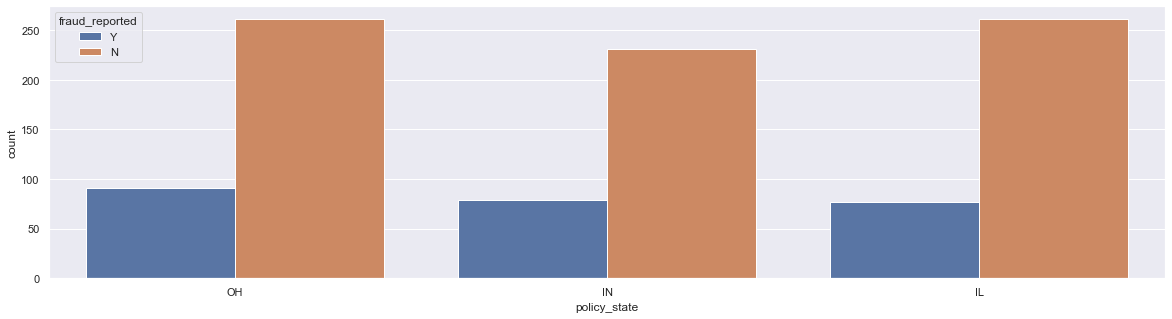

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


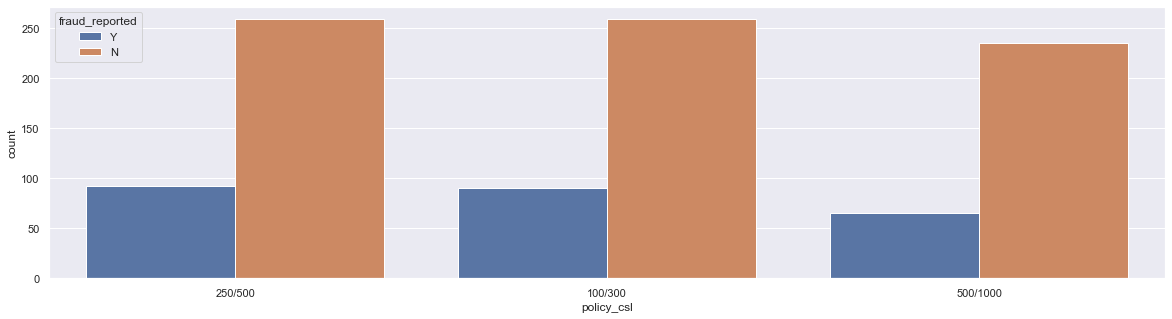

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


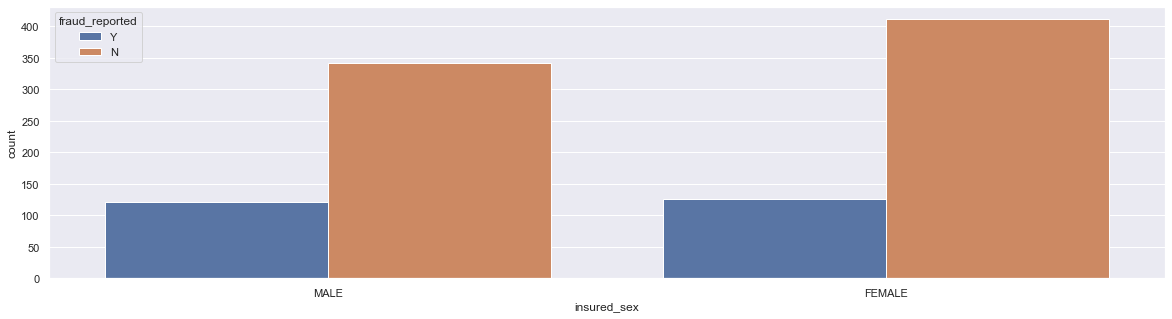

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


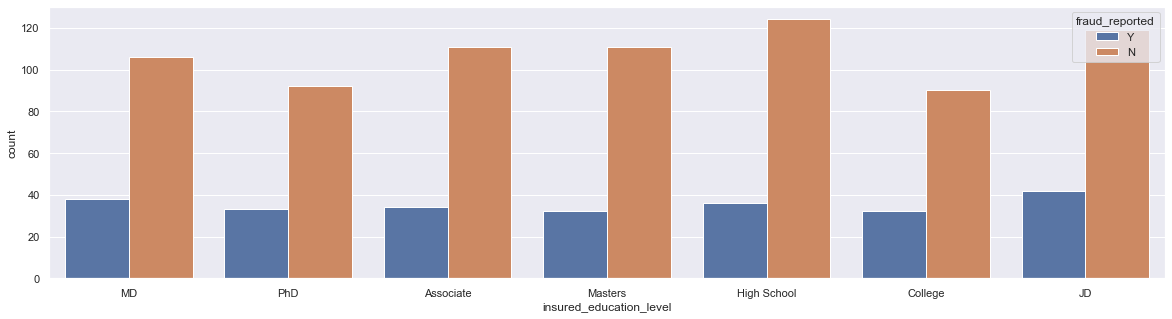

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


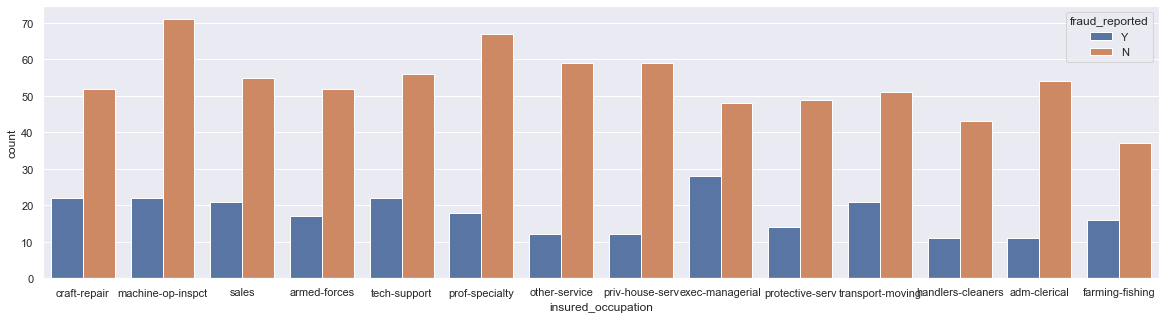

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
camping           55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


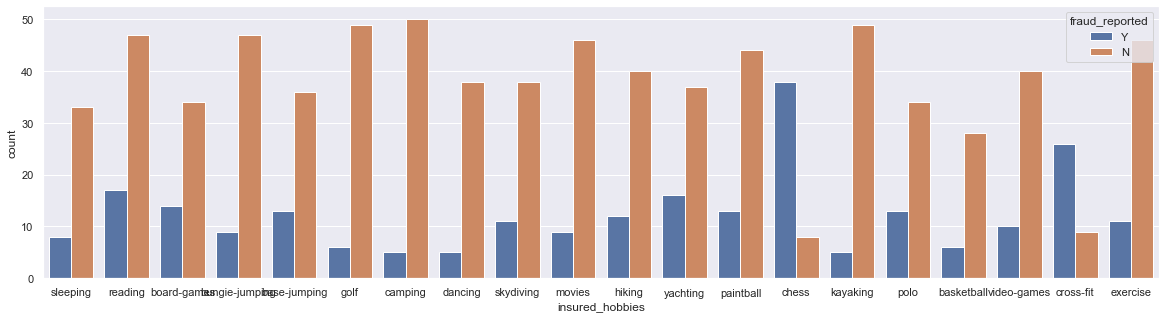

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


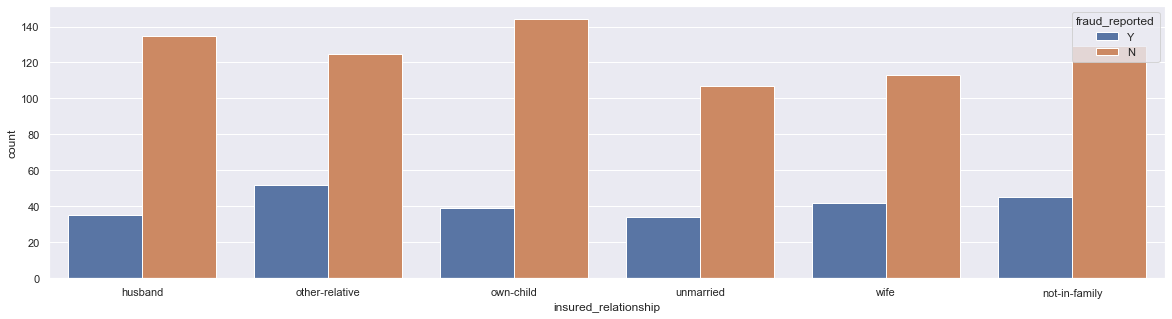

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


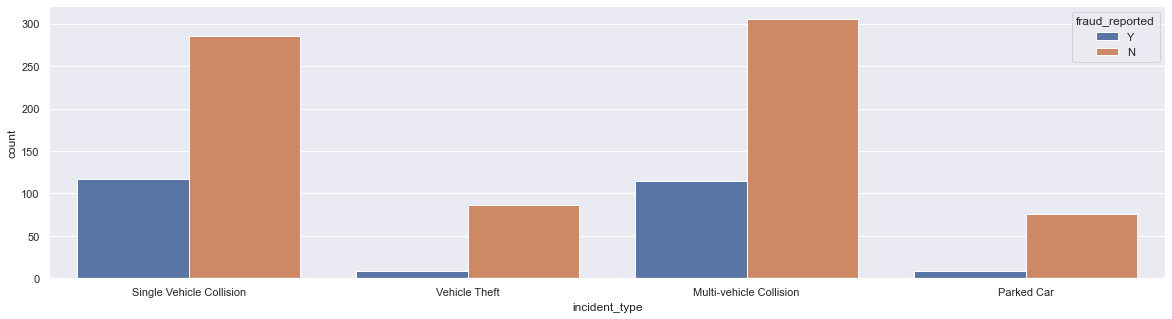

Rear Collision     292
Side Collision     276
Front Collision    254
No_info            178
Name: collision_type, dtype: int64


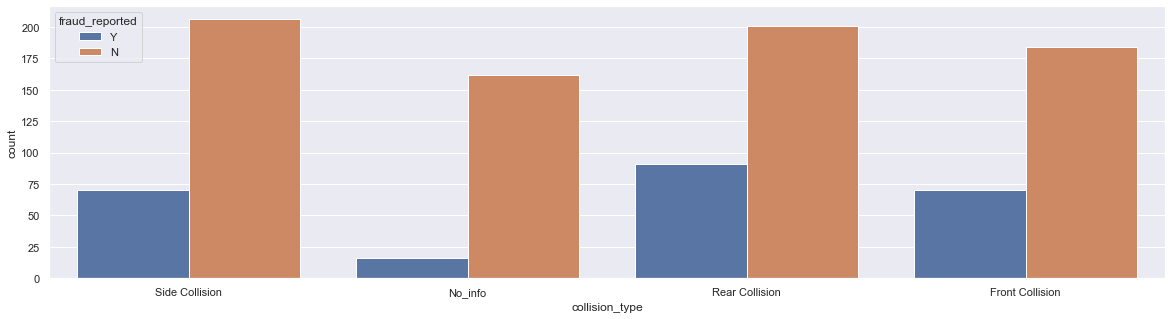

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


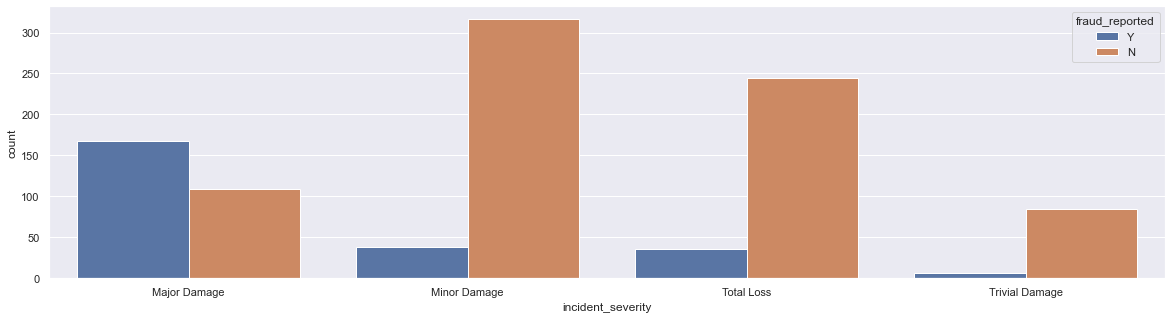

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


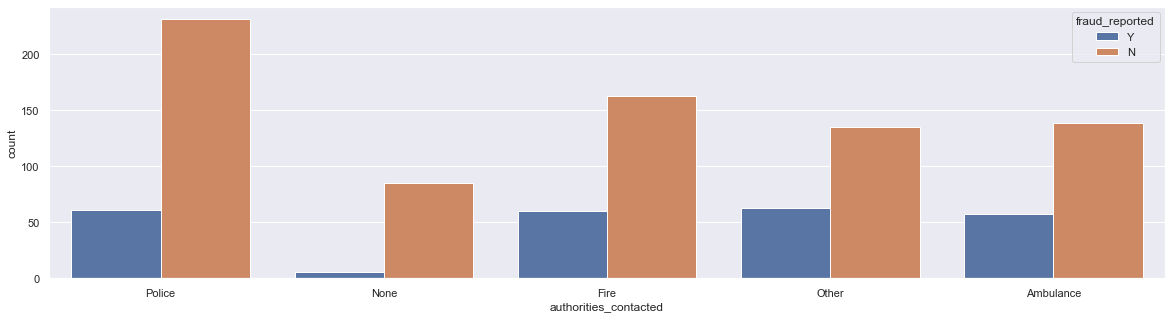

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


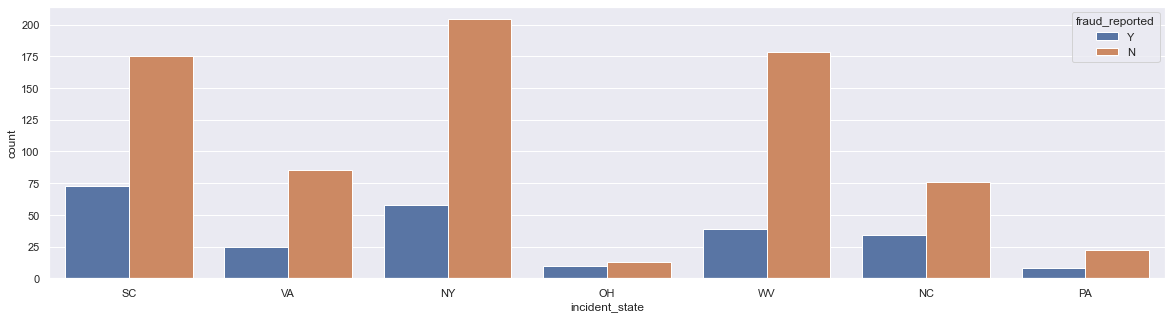

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


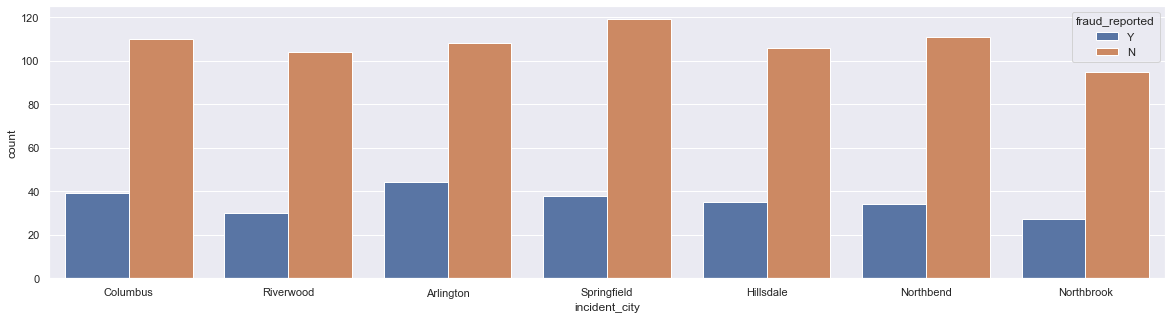

No_info    360
NO         338
YES        302
Name: property_damage, dtype: int64


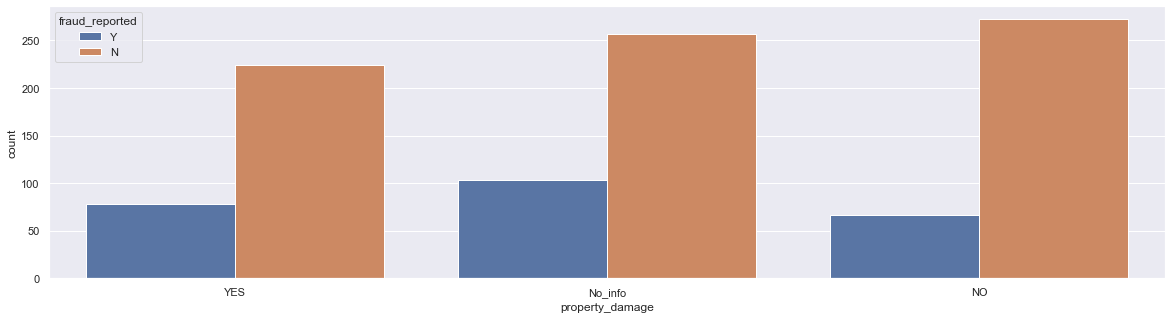

NO         343
No_info    343
YES        314
Name: police_report_available, dtype: int64


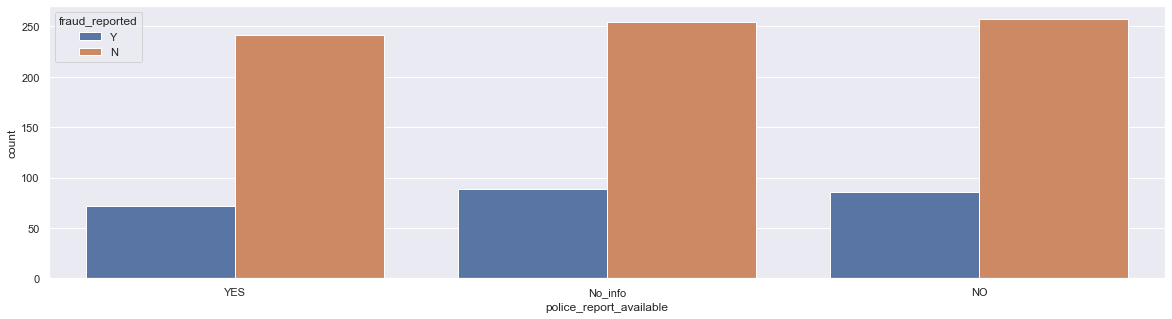

Dodge         80
Saab          80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


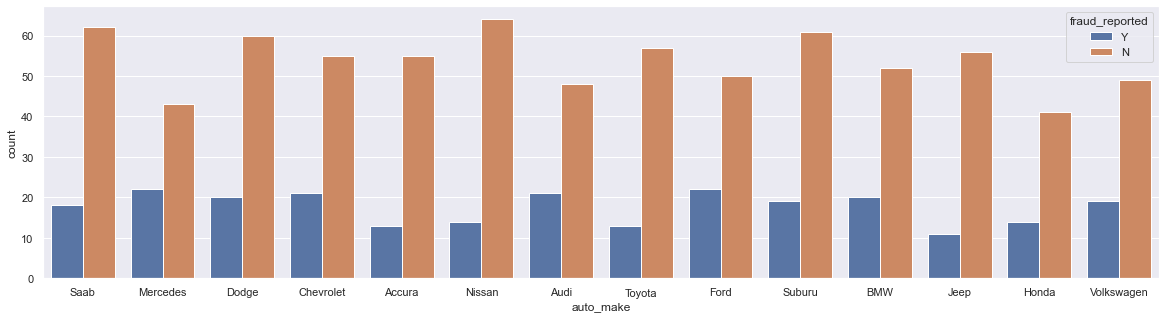

In [39]:
#checking against the target column

cols = ['policy_state', 'policy_csl', 'insured_sex', 
              'insured_education_level', 'insured_occupation', 'insured_hobbies', 
              'insured_relationship','incident_type', 'collision_type', 
              'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 
              'property_damage', 'police_report_available', 'auto_make']

for i in cols:
    plt.figure(figsize=(20,5))
    sns.countplot(x=i, hue='fraud_reported', data=df)
    print(df[i].value_counts())
    plt.show()

The number of fraud cases in plicy state is unifrmly distributed among the three sub categories

In policy csl, 250/500 ratio has the slightly higher fraud reported

Insured sex, most fraud seems to be in the woman category

Majority are highschool graduated, JD category seems to be having highest reported fraud


machine-op-inspct seems to be the most insured job 

chess as a hobby seems to be having a high number of fraud cases associated

Most insured relation is own child, other relative insurance has high number of fraud cases

Multi vehicle collision is the most clamed insurance

Major damage issues seems to be having high number of fraud cases

The most called authority is police

Mercedes seems to be highest clamimed vehecle  with most fraud cases


In [43]:
#Encoding the fraud reported column
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['fraud_reported']=oe.fit_transform(df['fraud_reported'].values.reshape(-1,1))

<Figure size 1440x360 with 0 Axes>

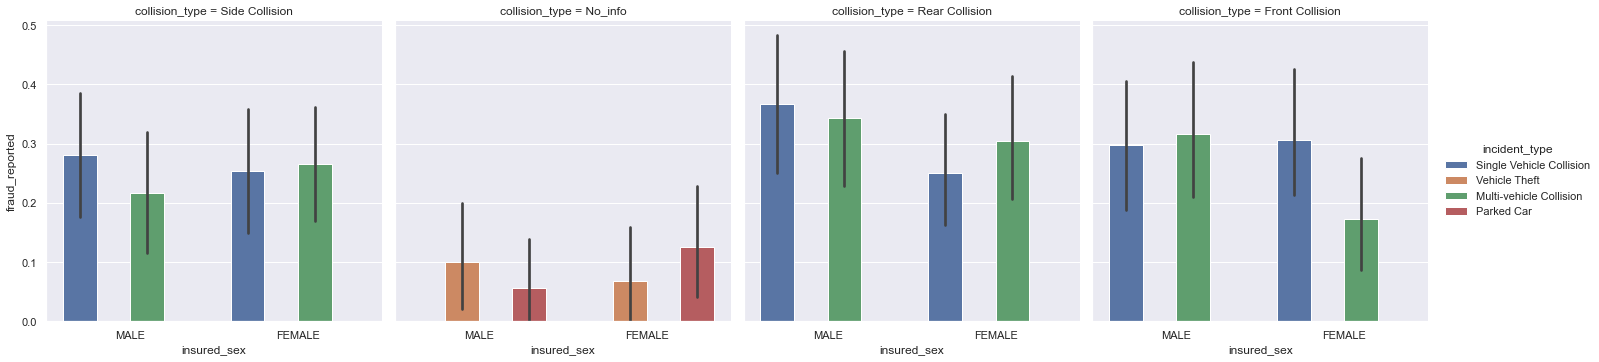

In [45]:
plt.figure(figsize=(20,5))
sns.catplot(x='insured_sex',y='fraud_reported',kind='bar',data=df,col='collision_type',hue='incident_type')

types of collitions
Male catogory has high number of insurance claims

In [46]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


numerical columns doesnt show mmuch skewness

In [47]:
#encoding
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [53]:
#checking correlation
dfcor=df.corr()

<AxesSubplot:>

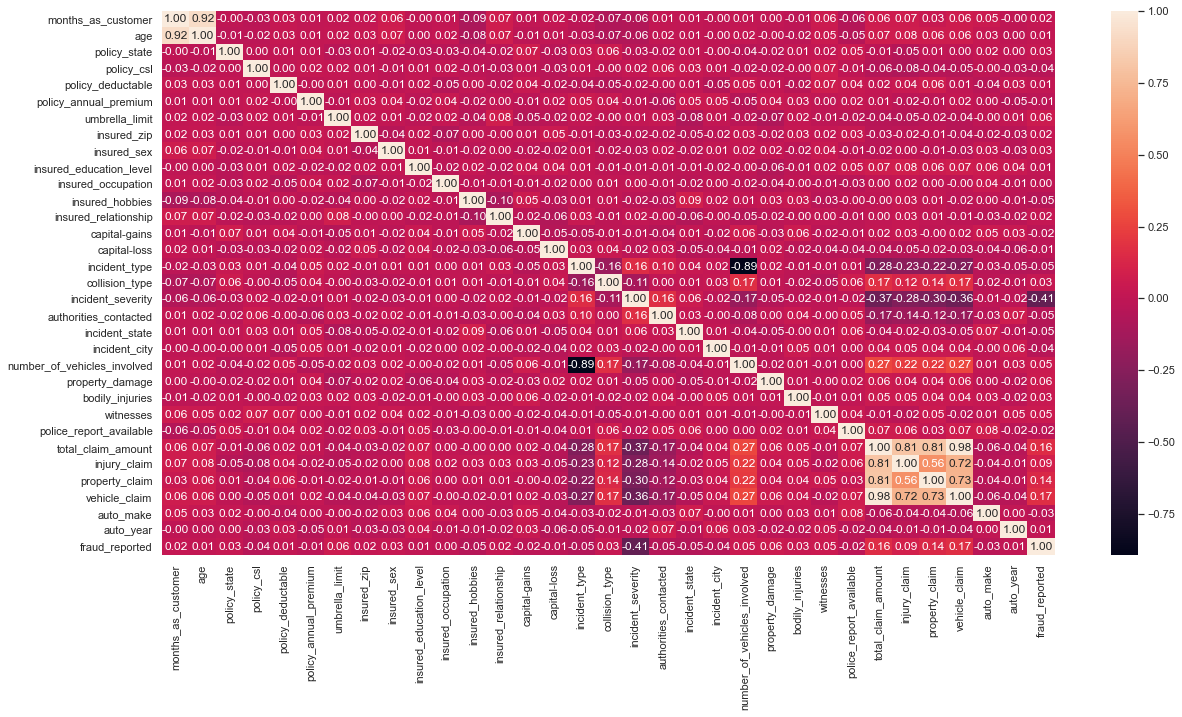

In [51]:
#plooting correlation
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')

In [54]:
#checking correlation to taget
dfcor['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
property_damage                0.060616
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
collision_type                 0.031032
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
insured_occupation             0.001564
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
police_report_available       -0.019571


vehicle_claim has the highest possitive correlation to target followed by total_claim_amount
incident_severity  has the hghest negative correlation

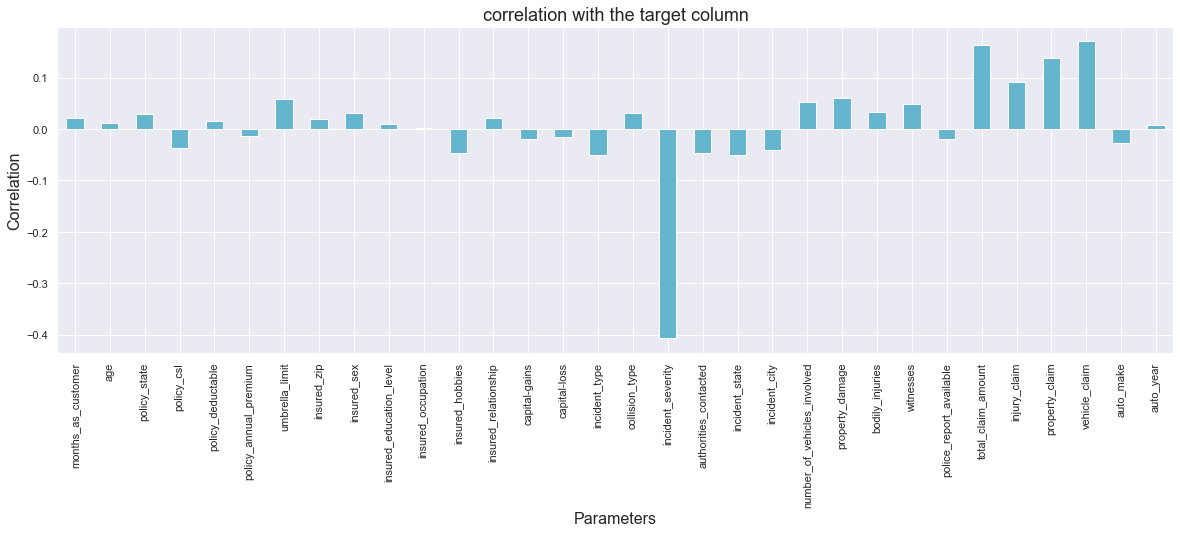

In [56]:
#plotting correlation to target
plt.figure(figsize = (20,6))
dfcor['fraud_reported'].drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Parameters', fontsize = 16)
plt.ylabel('Correlation', fontsize = 16)
plt.title('correlation with the target column', fontsize = 18)
plt.show()

vehicle_claim has the highest possitive correlation to target followed by total_claim_amount


incident_severity  has the hghest negative correlation

In [59]:
#checking  zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [60]:
dfn = df[(z<3).all(axis=1)]
print(df.shape)
print(dfn.shape)

(1000, 33)
(980, 33)


In [61]:
#keeping outlier free data
df = dfn

In [62]:
#splitting x and y
x = df.drop(['fraud_reported'], axis = 1)
y = df['fraud_reported']

In [63]:
x.shape

(980, 32)

In [64]:
y.shape

(980,)

In [65]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [66]:
#importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report    
from sklearn.model_selection import cross_val_score 

In [67]:
#checking the best random state

lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test, predlr)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('best accuracy',maxacc,'on random state',maxrs)

best accuracy 0.8299319727891157 on random state 63


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 63)

In [71]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(686, 32) (294, 32) (686,) (294,)


In [75]:
def model(mod):
    print('Model:',mod)
    mod.fit(x_train, y_train)
    mod.score(x_train, y_train)
    pred = mod.predict(x_test)
    ##print(confusion_matrix(y_test, pred))
    print('\n')
    print('\n')
    ##print(classification_report(y_test, pred))
    crossval_scores = cross_val_score(mod, x, y, cv = 5)
    accuracy=accuracy_score(y_test, pred)
    print('Accuracy score:',accuracy)
    ##print('Cross validation Scores for ', mod)
    ##print(crossval_scores)
    print('\n')
    mean_crossval=crossval_scores.mean()
    print('Mean cross validation Score: ',mean_crossval)
    difference=accuracy-mean_crossval
    print('difference between crossvalidation score and actual score:',difference)

In [76]:
model(LogisticRegression())

Model: LogisticRegression()




Accuracy score: 0.8299319727891157


Mean cross validation Score:  0.7755102040816327
difference between crossvalidation score and actual score: 0.05442176870748294


In [77]:
model(GaussianNB())

Model: GaussianNB()




Accuracy score: 0.7585034013605442


Mean cross validation Score:  0.7295918367346939
difference between crossvalidation score and actual score: 0.028911564625850317


In [78]:
model(RandomForestClassifier())

Model: RandomForestClassifier()




Accuracy score: 0.826530612244898


Mean cross validation Score:  0.7693877551020408
difference between crossvalidation score and actual score: 0.05714285714285716


In [79]:
model(KNeighborsClassifier())

Model: KNeighborsClassifier()




Accuracy score: 0.7517006802721088


Mean cross validation Score:  0.7173469387755101
difference between crossvalidation score and actual score: 0.034353741496598644


In [80]:
model(DecisionTreeClassifier())

Model: DecisionTreeClassifier()




Accuracy score: 0.7993197278911565


Mean cross validation Score:  0.7775510204081633
difference between crossvalidation score and actual score: 0.0217687074829932


In [81]:
k=['linear','poly','rbf']
for i in k:
    print('\n')
    print('SVC kernel:',i)
    print('\n')
    svc=SVC(kernel=i)
    model(svc)



SVC kernel: linear


Model: SVC(kernel='linear')




Accuracy score: 0.8333333333333334


Mean cross validation Score:  0.7765306122448979
difference between crossvalidation score and actual score: 0.056802721088435426


SVC kernel: poly


Model: SVC(kernel='poly')




Accuracy score: 0.7925170068027211


Mean cross validation Score:  0.7540816326530612
difference between crossvalidation score and actual score: 0.03843537414965992


SVC kernel: rbf


Model: SVC()




Accuracy score: 0.8061224489795918


Mean cross validation Score:  0.7489795918367346
difference between crossvalidation score and actual score: 0.05714285714285727


DecisionTreeClassifier will be selected based on cross validation score

In [84]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf': ['10', '17', '50',100], 'max_depth': [2, 7, 9,12,15],'min_samples_split':[2,3,5,7,9]}

In [85]:
dtc = DecisionTreeClassifier()
dtc_f = GridSearchCV(dtc, parameters)
dtc_f.fit(x_train, y_train)

print(dtc_f.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100, 'min_samples_split': 2}


In [87]:
dtc_final = DecisionTreeClassifier(criterion = 'gini',max_depth=2,min_samples_leaf=100,min_samples_split=2)
dtc_final.fit(x_train, y_train)
pred_dtc = dtc_final.predict(x_test)
print('Accuracy Score  : ', dtc_final)
print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

Accuracy Score  :  DecisionTreeClassifier(max_depth=2, min_samples_leaf=100)
0.8435374149659864
[[204  30]
 [ 16  44]]
              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90       234
         1.0       0.59      0.73      0.66        60

    accuracy                           0.84       294
   macro avg       0.76      0.80      0.78       294
weighted avg       0.86      0.84      0.85       294



### We are getting an accuracy score of 0.8435374149659864

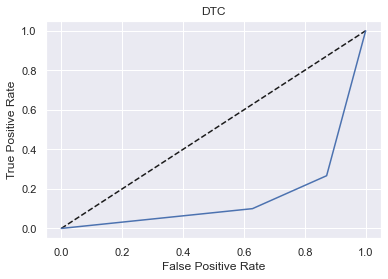

auc score: 0.8025641025641025


In [90]:
#Auc roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = dtc_final.predict_proba(x_test)[:, 0]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DTC')
plt.show()
auc_score = roc_auc_score(y_test, dtc_final.predict(x_test))
print('auc score:',auc_score)

In [93]:
#Saving model
import joblib
joblib.dump(dtc_final, 'Insurance.obj')

['Insurance.obj']

In [94]:
final = joblib.load('Insurance.obj')
final.predict(x_train)

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1.

### We are getting an accuracy score of 0.8435374149659864